Variable definitions

    DATOP - Date of flight
    FLTID - Flight number
    DEPSTN - Departure point
    ARRSTN - Arrival point
    STD - Scheduled Time departure
    STA - Scheduled Time arrival
    STATUS - Flight status
    ETD - Expected Time departure
    ETA - Expected Time arrival
    ATD - Actual Time of Departure
    ATA - Actual Time of arrival
    DELAY1 - Delay code 1
    DUR1 - delay time 1
    DELAY2 - Delay code 2
    DUR2 - delay time 2
    DELAY3 - Delay code 3
    DUR3 - delay time 3
    DELAY4 - Delay code 4
    DUR4 - delay time 4
    AC - Aircraft Code


In [26]:
#import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [27]:
#load data
df = pd.read_csv('data/Train.csv',sep=',')

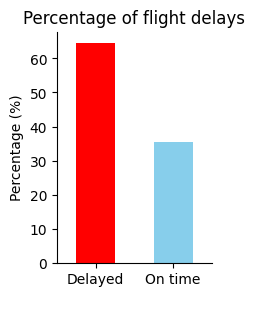

In [28]:
# Calculate the percentage of zero and non-zero values
value_counts = df['target'].apply(lambda x: 'Delayed' if x == 0 else 'On time').value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(2, 3))
ax = value_counts.plot(kind='bar', color=['red', 'skyblue'])

# Set labels and title
ax.set_xticklabels(['Delayed', 'On time'], rotation=0)
ax.set_ylabel('Percentage (%)')
ax.set_title('Percentage of flight delays')
plt.xlabel(' ')
# Remove the upper and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Save the figure to file in the folder './plots'
plt.savefig('./plots/delayed_vs_on_time.png', bbox_inches='tight',transparent=True)

# Show the plot
plt.show()

In [29]:
#user-defined target for classification
target_column = 'target'

## Initial exploration

In [30]:
df[target_column].mean()

48.73301308504818

In [31]:
df[target_column].var()

13720.739905099768

In [32]:
np.sum(df[target_column] > 0) / len(df.target) 

0.6460452737102742

In [33]:
np.sum(df[target_column] == 0) / len(df.target) 

0.3539547262897258

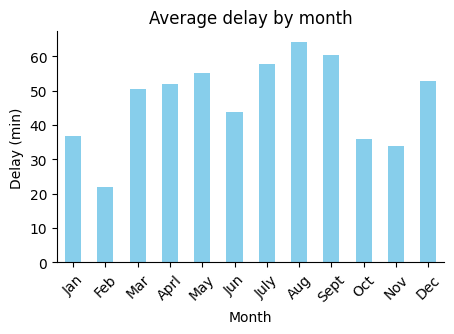

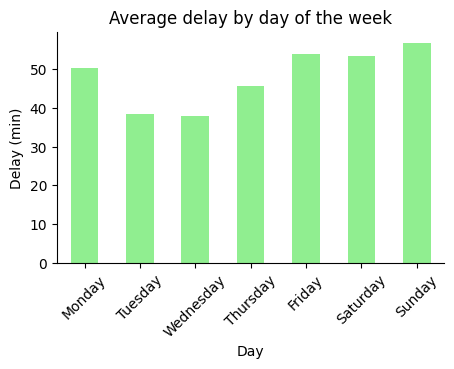

In [34]:
# Step 1: Convert DATOP to datetime format
df['DATOP'] = pd.to_datetime(df['DATOP'])

# Step 2: Extract month and day of the week
df['Month'] = df['DATOP'].dt.month
df['DayOfWeek'] = df['DATOP'].dt.day_name()

df['STD'] = pd.to_datetime(df['STD'])
df['Hour'] = df['STD'].dt.hour

# Step 3: Calculate the average target value by month
avg_by_month = df.groupby('Month')['target'].mean()


# Step 4: Calculate the average target value by day of the week
avg_by_day = df.groupby('DayOfWeek')['target'].mean()

# Step 5: Plot the average target by month
plt.figure(figsize=(5, 3))
avg_by_month.plot(kind='bar', color='skyblue')
plt.title('Average delay by month')
plt.xlabel('Month')
plt.ylabel('Delay (min)')
plt.xticks(rotation=45)
ax = plt.gca()
ax.set_xticks(np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Aprl', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.spines[['right', 'top']].set_visible(False)
# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_by_month', bbox_inches='tight',transparent=True)
plt.show()

# Step 6: Plot the average target by day of the week
plt.figure(figsize=(5, 3))
avg_by_day = avg_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])  # Reorder for better visualization
avg_by_day.plot(kind='bar', color='lightgreen')
plt.title('Average delay by day of the week')
plt.xlabel('Day')
plt.ylabel('Delay (min)')
plt.xticks(rotation=45)
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)
# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_by_day', bbox_inches='tight',transparent=True)
plt.show()



In [35]:
#I think we probably want to log-transform the target that to make it more normally distributed
df['target'] = df.target.apply(lambda x: np.log1p(x) if x > 0 else 0)

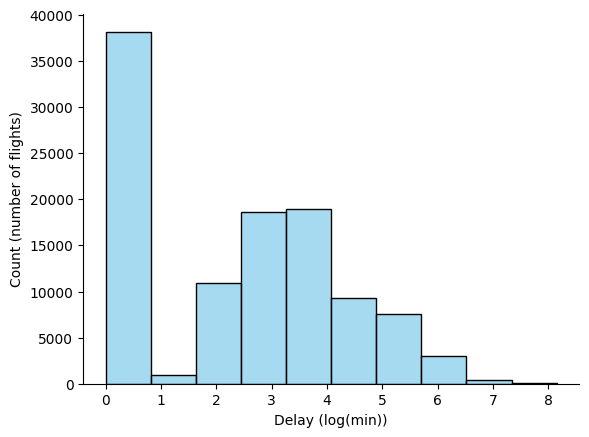

In [36]:
sns.histplot(df.target,bins=10,color='skyblue')
plt.xlabel('Delay (log(min))')
plt.ylabel('Count (number of flights)')
ax = plt.gca()
ax.spines[['right', 'top']].set_visible(False)

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Flight_delay_histogram', bbox_inches='tight',transparent=True)

# Show the plot
plt.show()


In [37]:
df.tail()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Month,DayOfWeek,Hour
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,7,Thursday,23
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,1,Saturday,8
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,11,Wednesday,5
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,1,Tuesday,18
107832,train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0,11,Tuesday,6


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107833 entries, 0 to 107832
Data columns (total 13 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ID         107833 non-null  object        
 1   DATOP      107833 non-null  datetime64[ns]
 2   FLTID      107833 non-null  object        
 3   DEPSTN     107833 non-null  object        
 4   ARRSTN     107833 non-null  object        
 5   STD        107833 non-null  datetime64[ns]
 6   STA        107833 non-null  object        
 7   STATUS     107833 non-null  object        
 8   AC         107833 non-null  object        
 9   target     107833 non-null  float64       
 10  Month      107833 non-null  int32         
 11  DayOfWeek  107833 non-null  object        
 12  Hour       107833 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(2), object(8)
memory usage: 9.9+ MB


In [39]:
import airportsdata

airports = airportsdata.load('IATA')  # key is the IATA location code
dummy = airports['BER'].copy()
dummy['iata'] = 'SXF' #SFX is not in use anymore, so use a placeholder that is the current berlin airport
airports['SXF'] = dummy

#clean up column names
df.columns = [col.lower() for col in df.columns]

#combine STD and STA into one column with scheduled flight duration	
df['std'] = pd.to_datetime(df['std'])
df['sta'] = pd.to_datetime(df['sta'],format='%Y-%m-%d %H.%M.%S')
df['flight_time'] = (df['sta'] - df['std']).dt.total_seconds() / 60 # Calculate the flight time in minutes
df['flight_time'] = df.flight_time.apply(lambda x: np.log1p(x))

#add latitude and longitude
df['dep_lat'] = df.depstn.apply(lambda x: airports[x]['lat'])
df['dep_lon'] = df.depstn.apply(lambda x: airports[x]['lon'])
df['arr_lat'] = df.arrstn.apply(lambda x: airports[x]['lat'])
df['arr_lon'] = df.arrstn.apply(lambda x: airports[x]['lon'])


#reducde departure and arrival codes to country code
df['dep_country'] = df.depstn.apply(lambda x: airports[x]['country'])
df['arr_country'] = df.arrstn.apply(lambda x: airports[x]['country'])

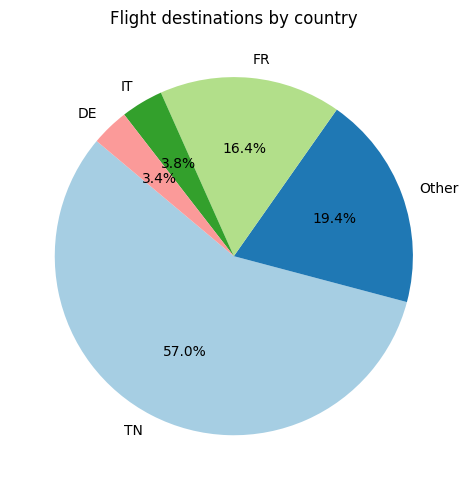

In [44]:
# Function to group small categories into 'Other'
def group_others(series, threshold=0.022):
    # Calculate relative frequencies
    relative_freq = series.value_counts(normalize=True)
    
    # Mask for small categories
    small_categories = relative_freq[relative_freq < threshold].index
    
    # Replace small categories with 'Other'
    return series.replace(small_categories, 'Other')

# Step 1: Group small categories into 'Other'
df['dep_grouped'] = group_others(df['dep_country'])
df['arr_grouped'] = group_others(df['arr_country'])

# Step 2: Calculate the distribution of grouped departure and arrival airports
dep_dist_grouped = df['dep_grouped'].value_counts()
arr_dist_grouped = df['arr_grouped'].value_counts()

# Step 3: Create the pie charts side by side
#fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig = plt.figure(figsize=(8, 5))

# Arrival airport pie chart
plt.pie(arr_dist_grouped, labels=arr_dist_grouped.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Flight destinations by country')

# Adjust layout to avoid overlap
plt.tight_layout()

# Save the figure to file in the folder './plots'
plt.savefig('./plots/Destination_piechart.png', bbox_inches='tight',transparent=True)

# Show the plot
plt.show()


In [46]:
#plot flight destinations (airport destinations) on a map
import plotly.express as px

df_counts = df[['depstn','dep_lat','dep_lon']].groupby('depstn').mean()
df_counts.reset_index(inplace=True)

fig = px.scatter_mapbox(df_counts, lat="dep_lat", lon="dep_lon", hover_name="depstn", color_discrete_sequence=["#001F3D"], height=700, width= 800, opacity= 0.8, zoom=1)
fig.update_layout(mapbox_style="open-street-map")